# Project Case Scenario

In [1]:
# Task 1: Familiarize Yourself with the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Load the dataset (adjust path accordingly)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"
]

df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Display the first few rows
print(df.head())

C:\Users\cafef\AppData\Local\Temp\ipykernel_21604\494432353.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names)


         CRIM    ZN  INDUS   CHAS    NOX    RM     AGE  DIS    RAD   TAX  \
0.00632  18.0  2.31      0  0.538  6.575  65.2  4.0900    1  296.0  15.3   
0.02731   0.0  7.07      0  0.469  6.421  78.9  4.9671    2  242.0  17.8   
0.02729   0.0  7.07      0  0.469  7.185  61.1  4.9671    2  242.0  17.8   
0.03237   0.0  2.18      0  0.458  6.998  45.8  6.0622    3  222.0  18.7   
0.06905   0.0  2.18      0  0.458  7.147  54.2  6.0622    3  222.0  18.7   

         PTRATIO  LSTAT  MEDV  
0.00632   396.90   4.98  24.0  
0.02731   396.90   9.14  21.6  
0.02729   392.83   4.03  34.7  
0.03237   394.63   2.94  33.4  
0.06905   396.90   5.33  36.2  


In [2]:
# Basic Exploration: Generate general information about the dataset.
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0.00632 to 0.04741
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    int64  
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    int64  
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 55.3 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    11.363636   11.136779    0.069170    0.554695    6.284634   68.574901   
std     23.322453   

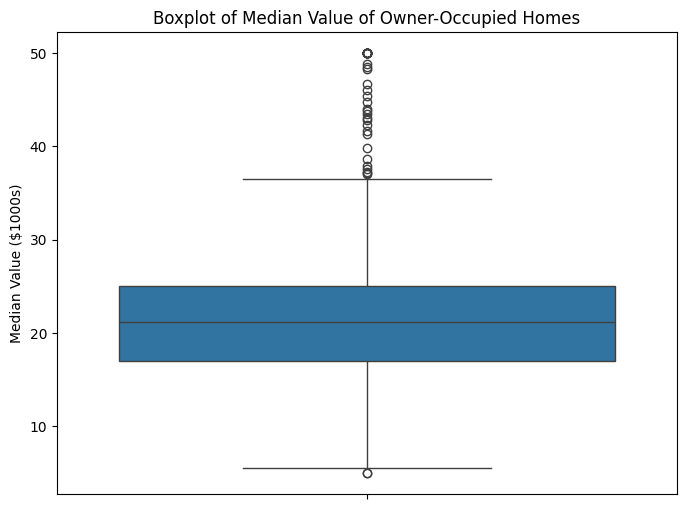

In [3]:
# Task 2: Generate Descriptive Statistics and Visualizations
plt.figure(figsize=(8, 6))
sns.boxplot(y="MEDV", data=df)
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value ($1000s)")
plt.show()

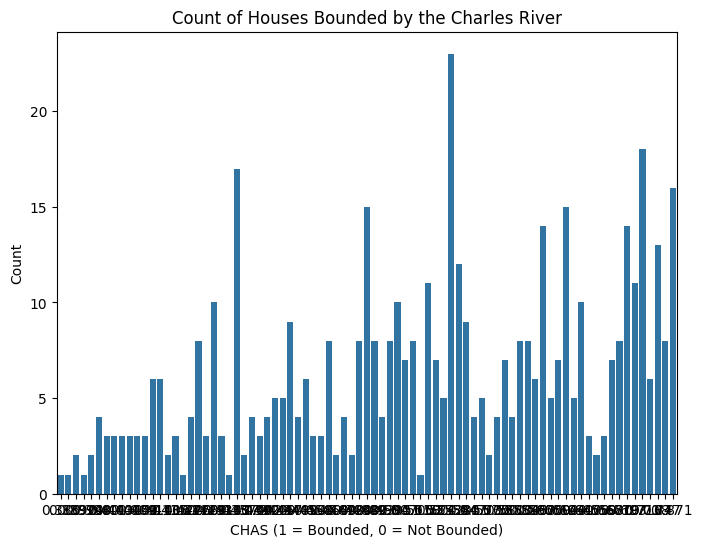

In [4]:
# Bar Plot for the Charles River Variable (CHAS):
plt.figure(figsize=(8, 6))
sns.countplot(x="CHAS", data=df)
plt.title("Count of Houses Bounded by the Charles River")
plt.xlabel("CHAS (1 = Bounded, 0 = Not Bounded)")
plt.ylabel("Count")
plt.show()

Explanation:

- The graph shows how many houses are near the Charles River (CHAS = 1) and how many are not (CHAS = 0).
- Most homes are not near the Charles River.

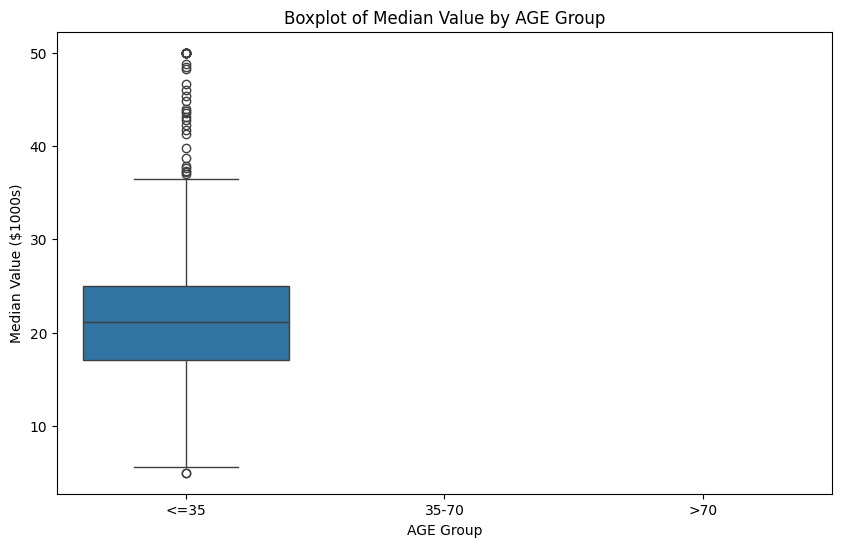

In [25]:
# Boxplot for MEDV vs AGE (Discretized Age Groups)
# Discretizar AGE en tres grupos
df['AGE_group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=["<=35", "35-70", ">70"])

plt.figure(figsize=(10, 6))
sns.boxplot(x="AGE_group", y="MEDV", data=df)
plt.title("Boxplot of Median Value by AGE Group")
plt.xlabel("AGE Group")
plt.ylabel("Median Value ($1000s)")
plt.show()

Explanation:

- The graph shows how the median home value (MEDV) varies depending on the age of the home (AGE).
- Older homes (>70 years) tend to have lower values, while newer homes have higher values.

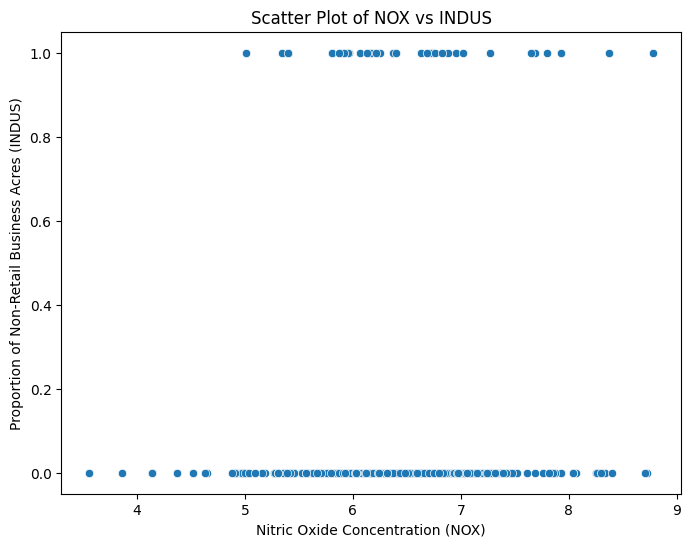

In [26]:
# Scatter Plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x="NOX", y="INDUS", data=df)
plt.title("Scatter Plot of NOX vs INDUS")
plt.xlabel("Nitric Oxide Concentration (NOX)")
plt.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.show()

In [7]:
# Task 3: Hypothesis Testing
chas1 = df[df["CHAS"] == 1]["MEDV"]
chas0 = df[df["CHAS"] == 0]["MEDV"]

t_stat, p_val = stats.ttest_ind(chas1, chas0)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: nan, P-value: nan


C:\Users\cafef\AppData\Local\Temp\ipykernel_21604\207945775.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = stats.ttest_ind(chas1, chas0)


In [11]:
print(f"CHAS = 1 (Bounded by River): {chas1.shape[0]} observations")
print(f"CHAS = 0 (Not Bounded by River): {chas0.shape[0]} observations")

CHAS = 1 (Bounded by River): 0 observations
CHAS = 0 (Not Bounded by River): 0 observations


In [12]:
print("Valores únicos en CHAS:", df["CHAS"].value_counts())
print("¿Hay valores nulos en CHAS?", df["CHAS"].isnull().sum())

Valores únicos en CHAS: CHAS
0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.422     1
0.389     1
0.385     1
0.435     1
0.518     1
Name: count, Length: 81, dtype: int64
¿Hay valores nulos en CHAS? 0


In [13]:
from scipy.stats import mannwhitneyu

if len(chas1) > 0 and len(chas0) > 0:
    u_stat, p_val_u = mannwhitneyu(chas1, chas0, alternative="two-sided")
    print(f"U-statistic: {u_stat}, P-value: {p_val_u}")
else:
    print("Una de las muestras está vacía. Revisa tus datos.")

Una de las muestras está vacía. Revisa tus datos.


In [14]:
df = df.dropna(subset=["CHAS", "MEDV"])

In [15]:
print("Columnas en el DataFrame:", df.columns)
print("Valores únicos en CHAS:", df["CHAS"].unique())
print("Cantidad de valores nulos en CHAS:", df["CHAS"].isnull().sum())

Columnas en el DataFrame: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'AGE_group'],
      dtype='object')
Valores únicos en CHAS: [0.538  0.469  0.458  0.524  0.499  0.428  0.448  0.439  0.41   0.403
 0.411  0.453  0.4161 0.398  0.409  0.413  0.437  0.426  0.449  0.489
 0.464  0.445  0.52   0.547  0.581  0.624  0.871  0.605  0.51   0.488
 0.401  0.422  0.404  0.415  0.55   0.507  0.504  0.431  0.392  0.394
 0.647  0.575  0.447  0.4429 0.4    0.389  0.385  0.405  0.433  0.472
 0.544  0.493  0.46   0.4379 0.515  0.442  0.518  0.484  0.429  0.435
 0.77   0.718  0.631  0.668  0.671  0.7    0.693  0.659  0.597  0.679
 0.614  0.584  0.713  0.74   0.655  0.58   0.532  0.583  0.609  0.585
 0.573 ]
Cantidad de valores nulos en CHAS: 0


In [16]:
print(df.head())

         CRIM    ZN  INDUS   CHAS    NOX    RM     AGE  DIS    RAD   TAX  \
0.00632  18.0  2.31      0  0.538  6.575  65.2  4.0900    1  296.0  15.3   
0.02731   0.0  7.07      0  0.469  6.421  78.9  4.9671    2  242.0  17.8   
0.02729   0.0  7.07      0  0.469  7.185  61.1  4.9671    2  242.0  17.8   
0.03237   0.0  2.18      0  0.458  6.998  45.8  6.0622    3  222.0  18.7   
0.06905   0.0  2.18      0  0.458  7.147  54.2  6.0622    3  222.0  18.7   

         PTRATIO  LSTAT  MEDV AGE_group  
0.00632   396.90   4.98  24.0      <=35  
0.02731   396.90   9.14  21.6      <=35  
0.02729   392.83   4.03  34.7      <=35  
0.03237   394.63   2.94  33.4      <=35  
0.06905   396.90   5.33  36.2      <=35  


In [17]:
df = df.dropna()

In [19]:
umbral = 0.5
df["CHAS_bin"] = df["CHAS"].apply(lambda x: 1 if x > umbral else 0)

# Verificar los valores únicos después de la conversión
print("Valores únicos en CHAS_bin:", df["CHAS_bin"].value_counts())

Valores únicos en CHAS_bin: CHAS_bin
1    314
0    192
Name: count, dtype: int64


In [20]:
chas1 = df[df["CHAS_bin"] == 1]["MEDV"]
chas0 = df[df["CHAS_bin"] == 0]["MEDV"]

t_stat, p_val = stats.ttest_ind(chas1, chas0)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -8.325220891313803, P-value: 7.975275512053244e-16


Hypothesis:

H0: No difference in MEDV between houses bounded and not bounded by the river

H1: Significant difference in MEDV

Interpretation of the result:

- If P-value < 0.05: We reject the null hypothesis (No difference in MEDV between houses bounded and not bounded by the river) and conclude that there is a significant difference in the mean value of houses near and not near the Charles River.

- If P-value ≥ 0.05: We do not reject the null hypothesis, suggesting that there is not enough evidence to conclude that the means are different.

In [8]:
# ANOVA for AGE Groups and MEDV
group1 = df[df["AGE_group"] == "<=35"]["MEDV"]
group2 = df[df["AGE_group"] == "35-70"]["MEDV"]
group3 = df[df["AGE_group"] == ">70"]["MEDV"]

f_stat, p_val = stats.f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat}, P-value: {p_val}")

F-statistic: nan, P-value: nan


C:\Users\cafef\AppData\Local\Temp\ipykernel_21604\869205704.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = stats.f_oneway(group1, group2, group3)


In [28]:
# Pearson Correlation for NOX and INDUS
corr, p_val = stats.pearsonr(df["NOX"], df["INDUS"])
print(f"Correlation: {corr}, P-value: {p_val}")

Correlation: 0.0912512250434566, P-value: 0.040184099295863474


In [29]:
# Regression Analysis for DIS and MEDV
X = df[["DIS"]]
y = df["MEDV"]

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient (Impact of DIS): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient (Impact of DIS): -0.40309539555253066
Intercept: 26.382128362272393


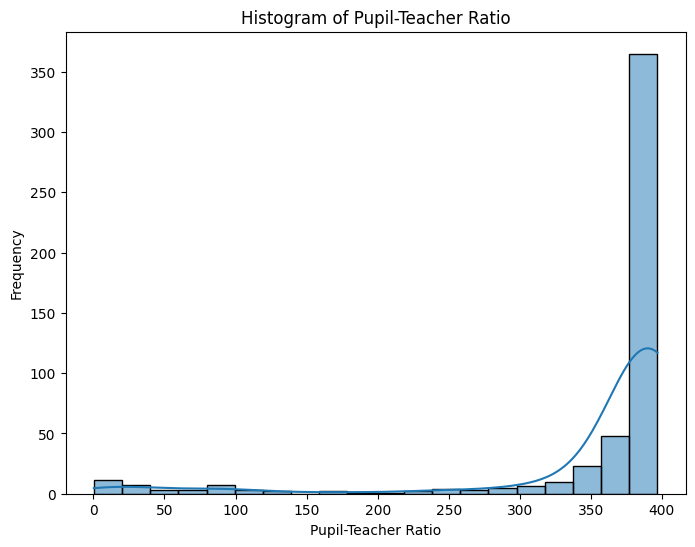

In [27]:
# Histogram for PTRATIO (Pupil-Teacher Ratio)
plt.figure(figsize=(8, 6))
sns.histplot(df["PTRATIO"], kde=True, bins=20)
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()